<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/nhan_dien_5_loai_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
%cd '/content/drive/MyDrive/phan_loai_hoa'

/content/drive/MyDrive/phan_loai_hoa


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/phan_loai_hoa/train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 370 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/phan_loai_hoa/test',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 186 images belonging to 5 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 100,validation_data=test_set,verbose = 1)

Epoch 1/100
12/12 [==============================] - 131s 10s/step - loss: 1.9135 - accuracy: 0.2730 - val_loss: 1.4797 - val_accuracy: 0.3333
Epoch 2/100
12/12 [==============================] - 12s 1s/step - loss: 1.3541 - accuracy: 0.4730 - val_loss: 1.2336 - val_accuracy: 0.4946
Epoch 3/100
12/12 [==============================] - 12s 1s/step - loss: 1.1808 - accuracy: 0.5568 - val_loss: 1.1785 - val_accuracy: 0.4892
Epoch 4/100
12/12 [==============================] - 12s 1s/step - loss: 1.1329 - accuracy: 0.5973 - val_loss: 1.1146 - val_accuracy: 0.5161
Epoch 5/100
12/12 [==============================] - 12s 987ms/step - loss: 0.9924 - accuracy: 0.6324 - val_loss: 1.1270 - val_accuracy: 0.5430
Epoch 6/100
12/12 [==============================] - 12s 1s/step - loss: 0.9380 - accuracy: 0.6541 - val_loss: 1.0016 - val_accuracy: 0.6237
Epoch 7/100
12/12 [==============================] - 12s 1s/step - loss: 0.8241 - accuracy: 0.6865 - val_loss: 1.0245 - val_accuracy: 0.6559
Epoch 8/

In [ ]:
training_set.class_indices

{'daisy': 0, 'lotus': 1, 'rose': 2, 'sunflower': 3, 'water lily': 4}

In [ ]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

1/1 [==============================] - 0s 282ms/step


array([2])

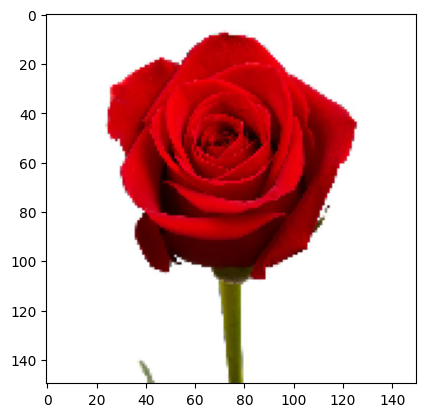

In [ ]:
img = load_img('/content/drive/MyDrive/phan_loai_hoa/val/globalrose-flower-bouquets-prime-100-red-roses-64_1000.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

1/1 [==============================] - 0s 19ms/step


array([1])

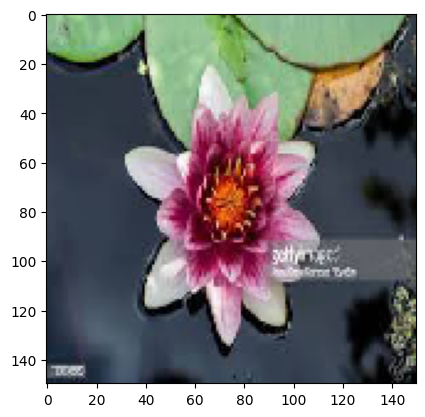

In [ ]:
img = load_img('/content/drive/MyDrive/phan_loai_hoa/val/7f49358c4b.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

1/1 [==============================] - 0s 25ms/step


array([0])

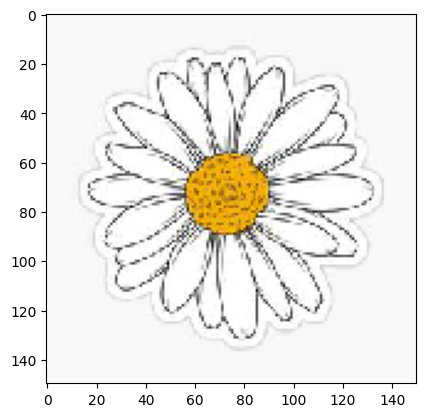

In [ ]:
img = load_img('/content/drive/MyDrive/phan_loai_hoa/val/5859c0a593958afebe903cc3ef3fcf6f.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('nhan_dien_5_loai_hoa')

Mounted at /content/drive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pathconf: Transport endpoint is not connected
--2023-04-13 18:19:42--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
colab_pdf.py: Transport endpoint is not connected

Cannot write to ‘colab_pdf.py’ (Success).


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-23dc126ebb57>", line 5, in <cell line: 5>
    colab_pdf('nhan_dien_5_loai_hoa')
  File "/content/drive/My Drive/phan_loai_hoa/colab_pdf.py", line 22, in colab_pdf
    raise ValueError(f"file '{file_name}' not found in path '{notebookpath}'.")
ValueError: file 'nhan_dien_5_loai_hoa' not found in path '/content/drive/MyDrive/Colab Notebooks/'.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  Fil